<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файл." data-toc-modified-id="Откроем-и-изучим-файл.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем и изучим файл.</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи." data-toc-modified-id="Исследование-задачи.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи.</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Обучение-модели-без-учёта-дисбаланса" data-toc-modified-id="Обучение-модели-без-учёта-дисбаланса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели без учёта дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

**Описание проекта**

Маркетологи банка «Бета-Банк» выявили что сохранить клиента дешевле, чем привлекать новых. 

Необходимо построить модель предсказаний которая сможет спрогнозировать уйдет ли клиент из банка в ближайшее время. Для этого предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Успешным результатом исследования будет тсчитаться, если удалось достичь метрики F1-меры не менее 0.59.

**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

## Откроем и изучим файл.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score, mean_squared_error, accuracy_score, roc_curve 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Подготовка данных

Переименуем столбцы и приведем названия к нижнем регистру для удобства и соответствия PEP8

In [5]:
df.columns = df.columns.str.lower()
#Проверим результат
df.columns.tolist()

['rownumber',
 'customerid',
 'surname',
 'creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited']

In [6]:
#Проверим данные на дубликаты
df.duplicated().sum()

0

Отлично. Дубликатов нет.

In [7]:
#Проверим пропуски в данных
df.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [8]:
#Посчитаем процент пропусков по столбцам
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

tenure             9.09
rownumber          0.00
customerid         0.00
surname            0.00
creditscore        0.00
geography          0.00
gender             0.00
age                0.00
balance            0.00
numofproducts      0.00
hascrcard          0.00
isactivemember     0.00
estimatedsalary    0.00
exited             0.00
dtype: float64

In [9]:
#Проверим уникальные значения столбца tenure
df['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Столбец содержит пропуски и содержит только целые числа. Заменим пропуски медианными значениями и изменим формат на Int64

In [10]:
df.loc[df['tenure'].isna(), 'tenure'] = df.loc[df['tenure'].isna() == False, 'tenure'].median()
df['tenure'] = df['tenure'].astype('int64')

В столбце 'row_number' содержется индекс строки, которые дублируется. Столбец 'surname' содержит фамилию клиента - информация в этом столбце не важна для прогноза.Столбец 'customerid' также содержит не важную для прогноза информацию. Удалим эти столбцы

In [11]:
df = df.drop(columns=['rownumber','surname','customerid'],axis=1)
df.head(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Исследование задачи.

### Разделение данных на выборки

In [12]:
#Разделим данные на три выборки

features = df.drop(columns=['exited'], axis=1)
target = df['exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.25, random_state=12345)

features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

В данных есть признаки с разными масштабами. Воспользуемся стандартизацией данных чтобы избежать этой ловушки, и приводем их к одному масштабу методом - StandardScaler()

In [13]:
columns_for_scaler = ['creditscore', 'age', 'tenure', 'balance','estimatedsalary']

scaler = StandardScaler()

scaler.fit(features_train[columns_for_scaler])

features_train[columns_for_scaler] = scaler.transform(features_train[columns_for_scaler])
features_valid[columns_for_scaler] = scaler.transform(features_valid[columns_for_scaler])
features_test[columns_for_scaler] = scaler.transform(features_test[columns_for_scaler])

pd.options.mode.chained_assignment = None

In [14]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
454,1.107585,0.011482,0.358552,0.819420,1,0,1,-0.757878,0,0,0
8307,-0.338704,-0.844298,-0.730444,0.923294,1,1,1,-1.194506,0,0,1
4811,-0.782922,-1.224645,0.721550,-1.220083,2,1,0,0.212357,0,1,0
1132,-0.235398,-0.178692,-0.004447,-1.220083,2,1,1,1.239310,0,0,1
9640,1.024940,-0.368865,-0.730444,-1.220083,1,1,0,1.583001,0,0,0


### Обучение модели без учёта дисбаланса

- Обучим модель «Решающее дерево» и проверим интересующие нас матрики баласа классов

In [15]:
model_tree = DecisionTreeClassifier(max_depth= 12, random_state=12345)
model_tree.fit(features_train, target_train)

predicted_tree = model_tree.predict(features_valid)

prob_tree = model_tree.predict_proba(features_valid)
prob_valid_tree = prob_tree[:, 1]

recall_tree = recall_score(target_valid,predicted_tree)
precision_tree = precision_score(target_valid,predicted_tree)

roc_auc_tree = roc_auc_score(target_valid, prob_valid_tree)
f1_tree = f1_score(target_valid, predicted_tree)

print(f'DecisionTreeClassifier Recall = {recall_tree:0.2f}, Precision = {precision_tree:0.2f}')
print(f'DecisionTreeClassifier F1-score = {f1_tree:0.2f}, AUC-ROC = {roc_auc_tree:0.2f}')

print(confusion_matrix(target_valid, predicted_tree))

DecisionTreeClassifier Recall = 0.49, Precision = 0.62
DecisionTreeClassifier F1-score = 0.55, AUC-ROC = 0.73
[[1074   98]
 [ 167  161]]


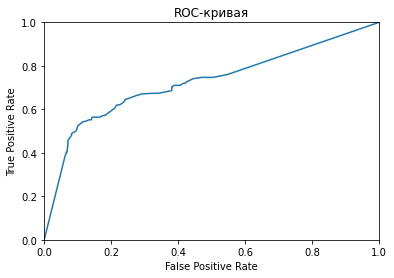

In [16]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_tree)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

- Обучим модель «Cлучайный лес» и проверим интересующие нас матрики баласа классов

In [17]:
model_forest = RandomForestClassifier(n_estimators=80, random_state=12345)
model_forest.fit(features_train, target_train)

predicted_forest = model_forest.predict(features_valid)
prob_forest = model_forest.predict_proba(features_valid)
prob_valid_forest = prob_forest[:, 1]

recall_forest = recall_score(target_valid,predicted_forest)
precision_forest = precision_score(target_valid,predicted_forest)

roc_auc_forest = roc_auc_score(target_valid, prob_valid_forest)
f1_forest = f1_score(target_valid, predicted_forest)

print(f'RandomForestClassifier Recall = {recall_forest:0.2f}, Precision = {precision_forest:0.2f}')
print(f'RandomForestClassifier F1-score = {f1_forest:0.2f}, AUC-ROC = {roc_auc_forest:0.2f}')

print(confusion_matrix(target_valid, predicted_forest))

RandomForestClassifier Recall = 0.45, Precision = 0.77
RandomForestClassifier F1-score = 0.57, AUC-ROC = 0.85
[[1127   45]
 [ 181  147]]


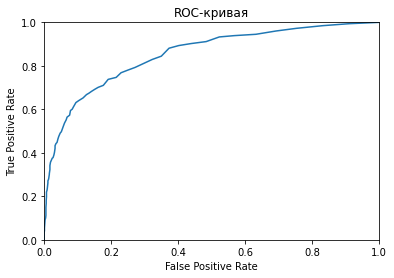

In [18]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_forest)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

- Обучим модель «Логистическая регрессия» и проверим интересующие нас матрики баласа классов

In [19]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs')
model_lr.fit(features_train, target_train)

predicted_lr = model_lr.predict(features_valid)
prob_lr = model_lr.predict_proba(features_valid)
prob_valid_lr = prob_lr[:, 1]

recall_lr = recall_score(target_valid,predicted_lr)
precision_lr = precision_score(target_valid,predicted_lr)

roc_auc_lr = roc_auc_score(target_valid, prob_valid_lr)
f1_lr = f1_score(target_valid, predicted_lr)

print(f'LogisticRegression Recall = {recall_lr:0.2f}, Precision = {precision_lr:0.2f}')
print(f'LogisticRegression F1-score = {f1_lr:0.2f}, AUC-ROC = {roc_auc_lr:0.2f}')

print(confusion_matrix(target_valid, predicted_lr))

LogisticRegression Recall = 0.19, Precision = 0.57
LogisticRegression F1-score = 0.28, AUC-ROC = 0.76
[[1125   47]
 [ 266   62]]


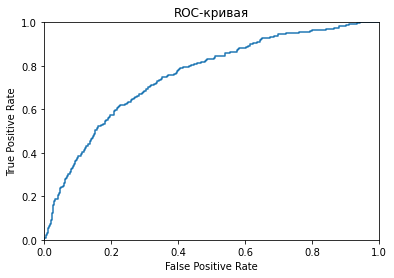

In [20]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_lr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Уточним 

0    0.7963
1    0.2037
Name: exited, dtype: float64


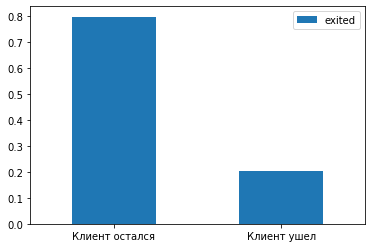

In [21]:
class_balance = df['exited'].value_counts(normalize=True)
print(class_balance)
class_balance.plot(kind='bar', legend=['exited'])

plt.xticks(ticks=class_balance.index, labels=['Клиент остался', 'Клиент ушел'], rotation=0)
plt.show()

**Вывод после исследования моделей без учёта дисбаланса:**

Рассмотрели несколько моделей предсказаний и выявили следующее: При анализе F1 и AUC-ROC метрик мы не получаем требуемых значений F1 - меры ( значение слишком низкое). AUC-ROC метрика и кривая показывает самые лучшие значения для модели «Случайный лес». Самые худшие результаты у модели «Логистическая регрессия» по всем метрикам.

Вероятная причина низкого значения f1 меры при относительно высоких значениях AUC-ROC метрики для модели «Случайный лес» в том, что  классы сильно разбалансированны и малое число истинно-отрицательных значений может влиять на показатели ложно-положительных и ложно-отрицательных значений.

Необходимо учесть дисбаланс классов и провести повторное исследование для моделей.

## Борьба с дисбалансом

### Увеличение выборки

In [22]:
#Напишем функцию которая увеличит выборку и перемешает данные для лучшего обучения

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [23]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print('Данные до увеличения выборки')
print('Значения: 0',target_train[target_train == 0].shape)
print('Значения: 1',target_train[target_train == 1].shape)
print('Данные после увеличения выборки')
print('Значения: 0',len(features_upsampled[target_upsampled == 0]))
print('Значения: 1',len(features_upsampled[target_upsampled == 1]))

Данные до увеличения выборки
Значения: 0 (6390,)
Значения: 1 (1610,)
Данные после увеличения выборки
Значения: 0 6390
Значения: 1 6440


- Обучим модель «Решающее дерево» на увеличенной выборке

In [24]:
model_tree = DecisionTreeClassifier(max_depth= 12, random_state=12345)
model_tree.fit(features_upsampled, target_upsampled)

predicted_tree = model_tree.predict(features_valid)

prob_tree = model_tree.predict_proba(features_valid)
prob_valid_tree = prob_tree[:, 1]

recall_tree = recall_score(target_valid,predicted_tree)
precision_tree = precision_score(target_valid,predicted_tree)

roc_auc_tree = roc_auc_score(target_valid, prob_valid_tree)
f1_tree = f1_score(target_valid, predicted_tree)

print(f'DecisionTreeClassifier Recall = {recall_tree:0.2f}, Precision = {precision_tree:0.2f}')
print(f'DecisionTreeClassifier F1-score = {f1_tree:0.2f}, AUC-ROC = {roc_auc_tree:0.2f}')

DecisionTreeClassifier Recall = 0.60, Precision = 0.49
DecisionTreeClassifier F1-score = 0.54, AUC-ROC = 0.74


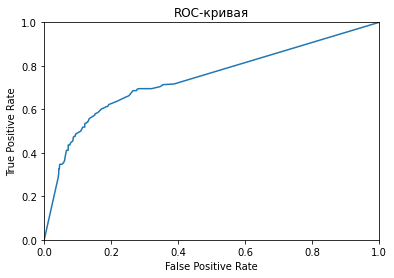

In [25]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_tree)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

- Обучим модель «Случайный лес» на увеличенной выборке

In [26]:
model_forest = RandomForestClassifier(n_estimators=80, random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)

predicted_forest = model_forest.predict(features_valid)
prob_forest = model_forest.predict_proba(features_valid)
prob_valid_forest = prob_forest[:, 1]

recall_forest = recall_score(target_valid,predicted_forest)
precision_forest = precision_score(target_valid,predicted_forest)

roc_auc_forest = roc_auc_score(target_valid, prob_valid_forest)
f1_forest = f1_score(target_valid, predicted_forest)

print(f'RandomForestClassifier Recall = {recall_forest:0.2f}, Precision = {precision_forest:0.2f}')
print(f'RandomForestClassifier F1-score = {f1_forest:0.2f}, AUC-ROC = {roc_auc_forest:0.2f}')

RandomForestClassifier Recall = 0.56, Precision = 0.69
RandomForestClassifier F1-score = 0.62, AUC-ROC = 0.85


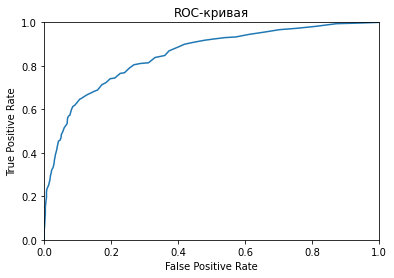

In [27]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_forest)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

- Обучим модель «Логистическая регрессия» на увеличенной выборке

In [28]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs')
model_lr.fit(features_upsampled, target_upsampled)

predicted_lr = model_lr.predict(features_valid)
prob_lr = model_lr.predict_proba(features_valid)
prob_valid_lr = prob_lr[:, 1]

recall_lr = recall_score(target_valid,predicted_lr)
precision_lr = precision_score(target_valid,predicted_lr)

roc_auc_lr = roc_auc_score(target_valid, prob_valid_lr)
f1_lr = f1_score(target_valid, predicted_lr)

print(f'LogisticRegression Recall = {recall_lr:0.2f}, Precision = {precision_lr:0.2f}')
print(f'LogisticRegression F1-score = {f1_lr:0.2f}, AUC-ROC = {roc_auc_lr:0.2f}')

LogisticRegression Recall = 0.70, Precision = 0.39
LogisticRegression F1-score = 0.50, AUC-ROC = 0.76


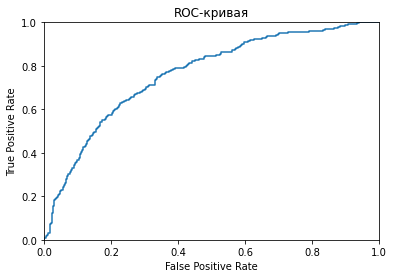

In [29]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_lr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Увеличение выборки дает хороший рост для метрики f1-меры модели «Случайный лес» и «Логистическая регрессия», попробуем уменьшить выборку и проверить как это отразиться на метрике

### Уменьшение выборки

In [30]:
#Напишем функцию которая уменьшит выборку и перемешает данные для лучшего обучения

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled,target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)
    return features_downsampled, target_downsampled

In [31]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

- Обучим модель «Решающее дерево» на уменьшенной выборке

In [32]:
model_tree = DecisionTreeClassifier(max_depth= 12, random_state=12345)
model_tree.fit(features_downsampled, target_downsampled)

predicted_tree = model_tree.predict(features_valid)

prob_tree = model_tree.predict_proba(features_valid)
prob_valid_tree = prob_tree[:, 1]

recall_tree = recall_score(target_valid,predicted_tree)
precision_tree = precision_score(target_valid,predicted_tree)

roc_auc_tree = roc_auc_score(target_valid, prob_valid_tree)
f1_tree = f1_score(target_valid, predicted_tree)

print(f'DecisionTreeClassifier Recall = {recall_tree:0.2f}, Precision = {precision_tree:0.2f}')
print(f'DecisionTreeClassifier F1-score = {f1_tree:0.2f}, AUC-ROC = {roc_auc_tree:0.2f}')

DecisionTreeClassifier Recall = 0.62, Precision = 0.46
DecisionTreeClassifier F1-score = 0.53, AUC-ROC = 0.72


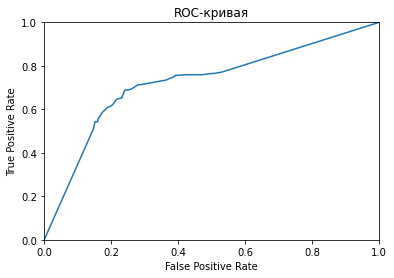

In [33]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_tree)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

- Обучим модель «Случайный лес» на уменьшенной выборке

In [34]:
model_forest = RandomForestClassifier(n_estimators=80, random_state=12345)
model_forest.fit(features_downsampled, target_downsampled)

predicted_forest = model_forest.predict(features_valid)
prob_forest = model_forest.predict_proba(features_valid)
prob_valid_forest = prob_forest[:, 1]

recall_forest = recall_score(target_valid,predicted_forest)
precision_forest = precision_score(target_valid,predicted_forest)

roc_auc_forest = roc_auc_score(target_valid, prob_valid_forest)
f1_forest = f1_score(target_valid, predicted_forest)

print(f'RandomForestClassifier Recall = {recall_forest:0.2f}, Precision = {precision_forest:0.2f}')
print(f'RandomForestClassifier F1-score = {f1_forest:0.2f}, AUC-ROC = {roc_auc_forest:0.2f}')

RandomForestClassifier Recall = 0.68, Precision = 0.59
RandomForestClassifier F1-score = 0.63, AUC-ROC = 0.86


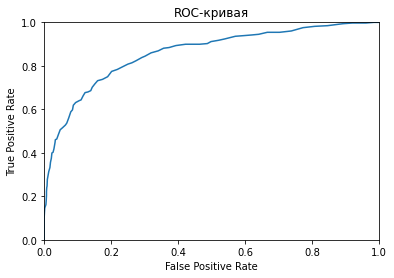

In [35]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_forest)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

- Обучим модель «Логистическая регрессия» на уменьшенной выборке

In [36]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs')
model_lr.fit(features_downsampled, target_downsampled)

predicted_lr = model_lr.predict(features_valid)
prob_lr = model_lr.predict_proba(features_valid)
prob_valid_lr = prob_lr[:, 1]

recall_lr = recall_score(target_valid,predicted_lr)
precision_lr = precision_score(target_valid,predicted_lr)

roc_auc_lr = roc_auc_score(target_valid, prob_valid_lr)
f1_lr = f1_score(target_valid, predicted_lr)

print(f'LogisticRegression Recall = {recall_lr:0.2f}, Precision = {precision_lr:0.2f}')
print(f'LogisticRegression F1-score = {f1_lr:0.2f}, AUC-ROC = {roc_auc_lr:0.2f}')

LogisticRegression Recall = 0.55, Precision = 0.46
LogisticRegression F1-score = 0.50, AUC-ROC = 0.76


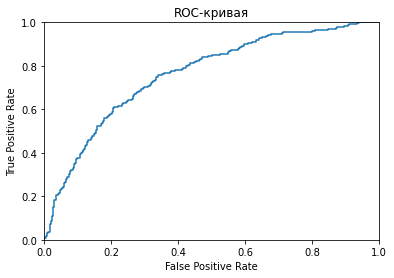

In [37]:
fpr, tpr, thresholds = roc_curve(target_valid, prob_valid_lr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Уменьшение выборки еще чуть лучше повлияло на качество метрики f1-меры для модели «Случайный лес». Так же для модели «Логистическая регрессия» показатели метрики улучшились

### Изменение порога

- Обучим модель «Решающее дерево» c измененями порогов

In [38]:
model_tree = DecisionTreeClassifier(max_depth= 12, random_state=12345)
model_tree.fit(features_train, target_train)


prob_tree = model_tree.predict_proba(features_valid)
prob_valid_tree = prob_tree[:, 1]


for threshold in np.arange(0, 0.3, 0.015):
    
    predicted_tree_threshold = prob_valid_tree > threshold 
    precision = precision_score(target_valid,predicted_tree_threshold)
    recall = recall_score(target_valid,predicted_tree_threshold)
    f1 = f1_score(target_valid, predicted_tree_threshold)
    roc_auc = roc_auc_score(target_valid, predicted_tree_threshold)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 Мера = {:.3f}, AUC-ROC = {:.3f}".format(
        threshold, precision, recall,f1,roc_auc))

Порог = 0.00 | Точность = 0.279, Полнота = 0.762, F1 Мера = 0.408, AUC-ROC = 0.606
Порог = 0.01 | Точность = 0.293, Полнота = 0.747, F1 Мера = 0.421, AUC-ROC = 0.621
Порог = 0.03 | Точность = 0.318, Полнота = 0.741, F1 Мера = 0.445, AUC-ROC = 0.648
Порог = 0.04 | Точность = 0.328, Полнота = 0.713, F1 Мера = 0.449, AUC-ROC = 0.652
Порог = 0.06 | Точность = 0.338, Полнота = 0.695, F1 Мера = 0.455, AUC-ROC = 0.657
Порог = 0.07 | Точность = 0.356, Полнота = 0.674, F1 Мера = 0.466, AUC-ROC = 0.666
Порог = 0.09 | Точность = 0.367, Полнота = 0.674, F1 Мера = 0.475, AUC-ROC = 0.674
Порог = 0.10 | Точность = 0.399, Полнота = 0.665, F1 Мера = 0.499, AUC-ROC = 0.692
Порог = 0.12 | Точность = 0.420, Полнота = 0.649, F1 Мера = 0.510, AUC-ROC = 0.699
Порог = 0.14 | Точность = 0.427, Полнота = 0.646, F1 Мера = 0.514, AUC-ROC = 0.702
Порог = 0.15 | Точность = 0.430, Полнота = 0.628, F1 Мера = 0.511, AUC-ROC = 0.698
Порог = 0.16 | Точность = 0.445, Полнота = 0.619, F1 Мера = 0.518, AUC-ROC = 0.702
Поро

- Обучим модель «Cлучайный лес» c измененями порогов

In [39]:
model_forest = RandomForestClassifier(n_estimators=80, random_state=12345)
model_forest.fit(features_train, target_train)

prob_forest = model_forest.predict_proba(features_valid)
predicted_valid_forest = prob_forest[:, 1]

for threshold in np.arange(0, 0.3, 0.015):
    
    predicted_forest_threshold = prob_valid_forest > threshold 
    precision = precision_score(target_valid,predicted_forest_threshold)
    recall = recall_score(target_valid,predicted_forest_threshold)
    f1 = f1_score(target_valid, predicted_forest_threshold)
    roc_auc = roc_auc_score(target_valid, predicted_forest_threshold)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 Мера = {:.3f}, AUC-ROC = {:.3f}".format(
        threshold, precision, recall,f1,roc_auc))

Порог = 0.00 | Точность = 0.221, Полнота = 1.000, F1 Мера = 0.362, AUC-ROC = 0.508
Порог = 0.01 | Точность = 0.225, Полнота = 0.997, F1 Мера = 0.367, AUC-ROC = 0.518
Порог = 0.03 | Точность = 0.233, Полнота = 0.997, F1 Мера = 0.377, AUC-ROC = 0.538
Порог = 0.04 | Точность = 0.238, Полнота = 0.994, F1 Мера = 0.384, AUC-ROC = 0.551
Порог = 0.06 | Точность = 0.246, Полнота = 0.985, F1 Мера = 0.393, AUC-ROC = 0.569
Порог = 0.07 | Точность = 0.261, Полнота = 0.976, F1 Мера = 0.412, AUC-ROC = 0.601
Порог = 0.09 | Точность = 0.267, Полнота = 0.960, F1 Мера = 0.418, AUC-ROC = 0.611
Порог = 0.10 | Точность = 0.275, Полнота = 0.954, F1 Мера = 0.427, AUC-ROC = 0.626
Порог = 0.12 | Точность = 0.286, Полнота = 0.954, F1 Мера = 0.440, AUC-ROC = 0.644
Порог = 0.14 | Точность = 0.292, Полнота = 0.945, F1 Мера = 0.446, AUC-ROC = 0.652
Порог = 0.15 | Точность = 0.306, Полнота = 0.939, F1 Мера = 0.461, AUC-ROC = 0.671
Порог = 0.16 | Точность = 0.315, Полнота = 0.936, F1 Мера = 0.471, AUC-ROC = 0.683
Поро

- Обучим модель «Логистическая регрессия» c измененями порогов

In [40]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs')
model_lr.fit(features_train, target_train)

prob_lr = model_lr.predict_proba(features_valid)
predicted_valid_lr = prob_lr[:, 1]

for threshold in np.arange(0, 0.3, 0.015):
    
    predicted_lr_threshold = predicted_valid_lr > threshold 
    precision = precision_score(target_valid,predicted_lr_threshold)
    recall = recall_score(target_valid,predicted_lr_threshold)
    f1 = f1_score(target_valid, predicted_lr_threshold)
    roc_auc = roc_auc_score(target_valid, predicted_lr_threshold)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 Мера = {:.3f}, AUC-ROC = {:.3f}".format(
        threshold, precision, recall,f1,roc_auc))

Порог = 0.00 | Точность = 0.219, Полнота = 1.000, F1 Мера = 0.359, AUC-ROC = 0.500
Порог = 0.01 | Точность = 0.219, Полнота = 1.000, F1 Мера = 0.359, AUC-ROC = 0.501
Порог = 0.03 | Точность = 0.224, Полнота = 1.000, F1 Мера = 0.366, AUC-ROC = 0.515
Порог = 0.04 | Точность = 0.235, Полнота = 0.982, F1 Мера = 0.379, AUC-ROC = 0.543
Порог = 0.06 | Точность = 0.247, Полнота = 0.963, F1 Мера = 0.394, AUC-ROC = 0.572
Порог = 0.07 | Точность = 0.264, Полнота = 0.951, F1 Мера = 0.413, AUC-ROC = 0.604
Порог = 0.09 | Точность = 0.281, Полнота = 0.930, F1 Мера = 0.432, AUC-ROC = 0.633
Порог = 0.10 | Точность = 0.292, Полнота = 0.887, F1 Мера = 0.439, AUC-ROC = 0.642
Порог = 0.12 | Точность = 0.306, Полнота = 0.860, F1 Мера = 0.451, AUC-ROC = 0.657
Порог = 0.14 | Точность = 0.323, Полнота = 0.826, F1 Мера = 0.465, AUC-ROC = 0.671
Порог = 0.15 | Точность = 0.337, Полнота = 0.802, F1 Мера = 0.474, AUC-ROC = 0.680
Порог = 0.16 | Точность = 0.351, Полнота = 0.787, F1 Мера = 0.485, AUC-ROC = 0.690
Поро

Измнения пороговых значений для моделей классификаторов не дало для нас значительных результатов. Этот параметр не будем использовать для тестовой выборки.

### Взвешивание классов

- Обучим модель «Решающее дерево» c балансом классов

In [41]:
model_tree = DecisionTreeClassifier(max_depth= 12, random_state=12345, class_weight='balanced')
model_tree.fit(features_train, target_train)

predicted_tree = model_tree.predict(features_valid)

prob_tree = model_tree.predict_proba(features_valid)
prob_valid_tree = prob_tree[:, 1]

recall_tree = recall_score(target_valid,predicted_tree)
precision_tree = precision_score(target_valid,predicted_tree)

roc_auc_tree = roc_auc_score(target_valid, prob_valid_tree)
f1_tree = f1_score(target_valid, predicted_tree)

print(f'DecisionTreeClassifier Recall = {recall_tree:0.2f}, Precision = {precision_tree:0.2f}')
print(f'DecisionTreeClassifier F1-score = {f1_tree:0.2f}, AUC-ROC = {roc_auc_tree:0.2f}')

DecisionTreeClassifier Recall = 0.62, Precision = 0.49
DecisionTreeClassifier F1-score = 0.55, AUC-ROC = 0.74


- Обучим модель «Cлучайный лес» c балансом классов


In [42]:
model_forest = RandomForestClassifier(n_estimators=80, random_state=12345, class_weight='balanced')
model_forest.fit(features_train, target_train)

predicted_forest = model_forest.predict(features_valid)
prob_forest = model_forest.predict_proba(features_valid)
prob_valid_forest = prob_forest[:, 1]

recall_forest = recall_score(target_valid,predicted_forest)
precision_forest = precision_score(target_valid,predicted_forest)

roc_auc_forest = roc_auc_score(target_valid, prob_valid_forest)
f1_forest = f1_score(target_valid, predicted_forest)

print(f'RandomForestClassifier Recall = {recall_forest:0.2f}, Precision = {precision_forest:0.2f}')
print(f'RandomForestClassifier F1-score = {f1_forest:0.2f}, AUC-ROC = {roc_auc_forest:0.2f}')

RandomForestClassifier Recall = 0.43, Precision = 0.79
RandomForestClassifier F1-score = 0.56, AUC-ROC = 0.86


- Обучим модель «Логистическая регрессия» c балансом классов

In [43]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs', class_weight='balanced')
model_lr.fit(features_train, target_train)

predicted_lr = model_lr.predict(features_valid)
prob_lr = model_lr.predict_proba(features_valid)
prob_valid_lr = prob_lr[:, 1]

recall_lr = recall_score(target_valid,predicted_lr)
precision_lr = precision_score(target_valid,predicted_lr)

roc_auc_lr = roc_auc_score(target_valid, prob_valid_lr)
f1_lr = f1_score(target_valid, predicted_lr)

print(f'LogisticRegression Recall = {recall_lr:0.2f}, Precision = {precision_lr:0.2f}')
print(f'LogisticRegression F1-score = {f1_lr:0.2f}, AUC-ROC = {roc_auc_lr:0.2f}')

LogisticRegression Recall = 0.70, Precision = 0.39
LogisticRegression F1-score = 0.50, AUC-ROC = 0.76


Взвешивание классов улучшает  только качество метрик для модели «Логистическая регрессия». Но этих значений метрик для выбора модели как победителя недостаточно.

### Подбор гиперпараметров

Для лучшей модели на основе прошлых исследований («Случайный лес») попробуем использовать подбор гиперпараметров

In [44]:
%%time
best_model_forest = None
best_result_forest = 0
best_est = 0
best_depth = 0
for est in range(10,150, 10):
    for depth in range (1, 21):
        model_rndforest = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth)
        model_rndforest.fit(features_train,target_train)
        _predictions_rndforest = model_rndforest.predict(features_valid)
        prob_forest = model_rndforest.predict_proba(features_valid)
        prob_valid_forest = prob_forest[:, 1]
        roc_auc_forest = roc_auc_score(target_valid, prob_valid_forest)
        result_forest = f1_score(target_valid, _predictions_rndforest)
        if result_forest > best_result_forest:
            best_model_forest = model_rndforest
            best_result_forest = result_forest
            best_est = est
            best_depth = depth
            best_roc_auc = roc_auc_forest
print(f'F1-score наилучшей модели на валидационной выборке:{best_result_forest:0.2f} '
      f'AUC-ROC наилучшей модели на валидационной выборке:{best_roc_auc:0.2f} '
      f'Количество деревьев:{best_est} Максимальная глубина:{depth}')

F1-score наилучшей модели на валидационной выборке:0.60 AUC-ROC наилучшей модели на валидационной выборке:0.86 Количество деревьев:130 Максимальная глубина:20
CPU times: total: 1min 46s
Wall time: 1min 46s


Подбор гиперпараметров так же не дал значительного улучшения модели.

**Общий вывод после исследования способов борьбы с дисбалансом:**

Изменения порога и балансировка классов не дает значимых результатов для нашего исследования. Лучшие изменения метрик в позитивную сторону дают методы Увелечения и Уменьшения выборок.

Лучшие показатели метрик дала модель «Случайного леса» в сочетании со способом Уменьшением выборки (**downsampling**):

 - F1-score = 0.63, AUC-ROC = 0.86
 
Это выше заданых значений для исследования. Для тестирвоания модели будем использовать данную модель в сочетании со способом Уменьшения выборки.

## Тестирование модели

In [45]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=12345,class_weight='balanced')
model_forest.fit(features_downsampled, target_downsampled)

predicted_forest = model_forest.predict(features_test)
prob_forest = model_forest.predict_proba(features_test)
prob_test_forest = prob_forest[:, 1]

recall_forest = recall_score(target_test,predicted_forest)
precision_forest = precision_score(target_test,predicted_forest)

roc_auc_forest = roc_auc_score(target_test, prob_test_forest)
f1_forest = f1_score(target_test, predicted_forest)

print(f'RandomForestClassifier Recall = {recall_forest:0.2f}, Precision = {precision_forest:0.2f}')
print(f'RandomForestClassifier F1-score = {f1_forest:0.2f}, AUC-ROC = {roc_auc_forest:0.2f}')

RandomForestClassifier Recall = 0.68, Precision = 0.58
RandomForestClassifier F1-score = 0.63, AUC-ROC = 0.87


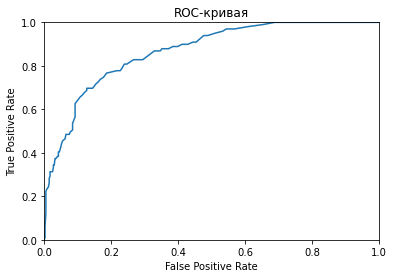

In [46]:
fpr, tpr, thresholds = roc_curve(target_test, prob_test_forest)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [47]:
dummy_model = DummyClassifier(strategy='uniform', random_state=123456)
dummy_model.fit(features_train, target_train)

dummy_pred_test = dummy_model.predict(features_test)
dummy_prob_test = dummy_model.predict_proba(features_test)
dummy_prob_one_test = dummy_prob_test[:, 1]

dummy_f1 = f1_score(target_test, dummy_pred_test)
dummy_roc_auc = roc_auc_score(target_test, dummy_prob_one_test)

print(f'Результат случайной модели на тестовой выборке: F1-мера = {dummy_f1:0.2f}, AUC-ROC = {dummy_roc_auc:.2f}')

Результат случайной модели на тестовой выборке: F1-мера = 0.28, AUC-ROC = 0.50


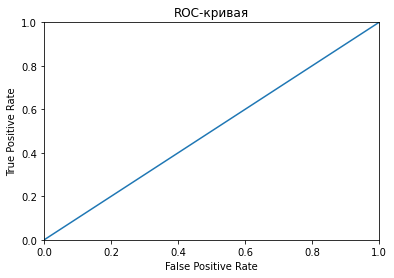

In [48]:
fpr, tpr, thresholds = roc_curve(target_test, dummy_prob_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Получилось достичь значений выше требуемой метрики для нашего исследования модели предсказаний:

 - F1-мера = 0.63, AUC-ROC = 0.87
 
Проверка адекватности модели на случайной модели дает значения:
 - F1-мера = 0.28, AUC-ROC = 0.50

F1-мера дает значение ниже полученого при тестировании "модели- победитлея" ниже более чем в 2 раза. ROC - кривая случайной модели также соотвествует случайной модели

## Вывод

При обучении моделей предсказаний выявили проблему связанную с сильно несбалансированными наборами данных.
Для решения проблемы и повышении метрик F1-меры и AUC-ROC использовали способы:
- Увеличение выборки
- Уменьшение выборки
- Изменение порога
- Взвешивание классов
- Перебор гиперпараметров

Лучшие результаты дали сочетания модель «Случайного леса»со способом Уменьшения выборки (downsampling). При проверке на тестовой выборке так же использовали метод Взвешивания классов, что тоже повысил качество ключевых метрик при оценки качества модели.

В результаты были получены следующие значения:

 - F1-мера = 0.63, AUC-ROC = 0.87
